### Building the Music Recommender

In [1]:
import pandas as pd

In [2]:
music_df = pd.read_csv('Data/large_musicset.csv')
music_df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name,artist_id
0,0,0.776,0.378,0,-8.035,1,0.0322,0.4350,0.001870,0.1100,...,audio_features,2EgfLUS0jNiujIWc3ZLEtn,spotify:track:2EgfLUS0jNiujIWc3ZLEtn,https://api.spotify.com/v1/tracks/2EgfLUS0jNiu...,https://api.spotify.com/v1/audio-analysis/2Egf...,175861,4,Tangerine,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
1,1,0.663,0.697,0,-5.503,1,0.0508,0.2720,0.008860,0.1530,...,audio_features,2ngRZDAluwYoJeuqEA4dhK,spotify:track:2ngRZDAluwYoJeuqEA4dhK,https://api.spotify.com/v1/tracks/2ngRZDAluwYo...,https://api.spotify.com/v1/audio-analysis/2ngR...,198384,4,Sidestep,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
2,2,0.596,0.675,9,-7.790,1,0.0517,0.1880,0.739000,0.1020,...,audio_features,3tcJ3yUXKtJpsgpAyVzP7R,spotify:track:3tcJ3yUXKtJpsgpAyVzP7R,https://api.spotify.com/v1/tracks/3tcJ3yUXKtJp...,https://api.spotify.com/v1/audio-analysis/3tcJ...,242163,4,Crime of Passion,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
3,3,0.593,0.274,2,-15.402,1,0.2780,0.9340,0.000569,0.0758,...,audio_features,6W4osAjSVCvUwOlVFBP76n,spotify:track:6W4osAjSVCvUwOlVFBP76n,https://api.spotify.com/v1/tracks/6W4osAjSVCvU...,https://api.spotify.com/v1/audio-analysis/6W4o...,226683,4,Together Lonely,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
4,4,0.871,0.281,9,-10.650,0,0.0466,0.7670,0.000180,0.1470,...,audio_features,1vdpFZ4rsQevl8WC6m3m9y,spotify:track:1vdpFZ4rsQevl8WC6m3m9y,https://api.spotify.com/v1/tracks/1vdpFZ4rsQev...,https://api.spotify.com/v1/audio-analysis/1vdp...,184259,4,Small Talk,Tim Atlas,3CiuXDKttPUT0tWGHicFUH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222308,222308,0.906,0.724,6,-4.109,0,0.0931,0.4460,0.000000,0.0848,...,audio_features,4dUlJyHgdz6IeCJIYMHHDm,spotify:track:4dUlJyHgdz6IeCJIYMHHDm,https://api.spotify.com/v1/tracks/4dUlJyHgdz6I...,https://api.spotify.com/v1/audio-analysis/4dUl...,164769,4,Me Gusta - Remix (feat. Cardi B & 24kGoldn),Cardi B,4kYSro6naA4h99UJvo89HB
222309,222309,0.934,0.443,1,-7.541,1,0.4100,0.0272,0.000000,0.0889,...,audio_features,051wt8AyLFgYnVuberd3vO,spotify:track:051wt8AyLFgYnVuberd3vO,https://api.spotify.com/v1/tracks/051wt8AyLFgY...,https://api.spotify.com/v1/audio-analysis/051w...,187541,4,WAP (feat. Megan Thee Stallion),Cardi B,4kYSro6naA4h99UJvo89HB
222310,222310,0.903,0.447,6,-11.554,1,0.1160,0.0873,0.000000,0.1360,...,audio_features,3DyiAk1BzIF8rq9rimypG4,spotify:track:3DyiAk1BzIF8rq9rimypG4,https://api.spotify.com/v1/tracks/3DyiAk1BzIF8...,https://api.spotify.com/v1/audio-analysis/3Dyi...,374545,4,La Bebe - Remix,Cardi B,4kYSro6naA4h99UJvo89HB
222311,222311,0.805,0.835,0,-4.603,1,0.0896,0.1300,0.000005,0.3650,...,audio_features,1EJgymgJHcjSOGSHcYaxvW,spotify:track:1EJgymgJHcjSOGSHcYaxvW,https://api.spotify.com/v1/tracks/1EJgymgJHcjS...,https://api.spotify.com/v1/audio-analysis/1EJg...,188230,4,South of the Border (feat. Camila Cabello & Ca...,Cardi B,4kYSro6naA4h99UJvo89HB


In [3]:
def drop_columns(music_df) :                 
    music_df.drop(columns=['uri'], inplace=True)
    music_df.drop(columns=['track_href'], inplace=True)
    music_df.drop(columns=['Unnamed: 0'], inplace=True)
    music_df.drop(columns=['type'], inplace=True)
    music_df.drop(columns=['analysis_url'], inplace=True)
    music_df.drop(columns=['artist_id'], inplace=True)
    
    return music_df

In [4]:
music_df = drop_columns(music_df)

In [5]:
len(music_df) #222313

222313

In [6]:
music_df.to_csv('Data/large_musicset_df.csv')

### K-Means is a distance based algorithm 

In [7]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [8]:
music_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,222313.000000,2.223130e+05,222313.000000
mean,0.572925,0.624311,5.277190,-8.831180,0.621183,0.098195,0.279866,0.200119,0.219634,0.448919,121.531551,2.349372e+05,3.912205
std,0.179407,0.244550,3.605864,5.031409,0.485094,0.124871,0.323469,0.333565,0.205911,0.252089,29.527075,1.347118e+05,0.443912
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312000e+03,0.000000
25%,0.454000,0.463000,2.000000,-10.614000,0.000000,0.036700,0.014000,0.000000,0.097300,0.239000,99.857000,1.794130e+05,4.000000
50%,0.588000,0.663000,5.000000,-7.623000,1.000000,0.050600,0.121000,0.000630,0.129000,0.434000,121.990000,2.180530e+05,4.000000
75%,0.708000,0.824000,9.000000,-5.565000,1.000000,0.094900,0.497000,0.283000,0.274000,0.645000,139.400000,2.685000e+05,4.000000
max,0.995000,1.000000,11.000000,2.781000,1.000000,0.965000,0.996000,1.000000,1.000000,1.000000,248.019000,5.823661e+06,5.000000


In [9]:
music_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
time_signature        int64
track_name           object
artist_name          object
dtype: object

In [10]:
music_df_s = music_df.drop(columns=['danceability',
                                    'energy',
                                    'key',
                                    'loudness',
                                    'mode',
                                    'speechiness',
                                    'acousticness',
                                    'instrumentalness', 
                                    'liveness',
                                    'valence', 
                                    'tempo', 
                                    'duration_ms',
                                    'time_signature'])
music_df_s

,id,track_name,artist_name
0,2EgfLUS0jNiujIWc3ZLEtn,Tangerine,Tim Atlas
1,2ngRZDAluwYoJeuqEA4dhK,Sidestep,Tim Atlas
2,3tcJ3yUXKtJpsgpAyVzP7R,Crime of Passion,Tim Atlas
3,6W4osAjSVCvUwOlVFBP76n,Together Lonely,Tim Atlas
4,1vdpFZ4rsQevl8WC6m3m9y,Small Talk,Tim Atlas
...,...,...,...
222308,4dUlJyHgdz6IeCJIYMHHDm,Me Gusta - Remix (feat. Cardi B & 24kGoldn),Cardi B
222309,051wt8AyLFgYnVuberd3vO,WAP (feat. Megan Thee Stallion),Cardi B
222310,3DyiAk1BzIF8rq9rimypG4,La Bebe - Remix,Cardi B
222311,1EJgymgJHcjSOGSHcYaxvW,South of the Border (feat. Camila Cabello & Ca...,Cardi B


In [11]:
X=music_df.drop(columns=['id',
                         'track_name',
                         'artist_name'])
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.776,0.378,0,-8.035,1,0.0322,0.4350,0.001870,0.1100,0.453,135.981,175861,4
1,0.663,0.697,0,-5.503,1,0.0508,0.2720,0.008860,0.1530,0.873,180.035,198384,4
2,0.596,0.675,9,-7.790,1,0.0517,0.1880,0.739000,0.1020,0.155,164.985,242163,4
3,0.593,0.274,2,-15.402,1,0.2780,0.9340,0.000569,0.0758,0.346,160.031,226683,4
4,0.871,0.281,9,-10.650,0,0.0466,0.7670,0.000180,0.1470,0.541,99.975,184259,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222308,0.906,0.724,6,-4.109,0,0.0931,0.4460,0.000000,0.0848,0.744,110.021,164769,4
222309,0.934,0.443,1,-7.541,1,0.4100,0.0272,0.000000,0.0889,0.359,133.026,187541,4
222310,0.903,0.447,6,-11.554,1,0.1160,0.0873,0.000000,0.1360,0.239,99.009,374545,4
222311,0.805,0.835,0,-4.603,1,0.0896,0.1300,0.000005,0.3650,0.722,125.027,188230,4


In [12]:
scaler = StandardScaler()
scaler=scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.776,0.378,0,-8.035,1,0.0322,0.435,0.001870,0.1100,0.453,135.981,175861,4
1,0.663,0.697,0,-5.503,1,0.0508,0.272,0.008860,0.1530,0.873,180.035,198384,4
2,0.596,0.675,9,-7.790,1,0.0517,0.188,0.739000,0.1020,0.155,164.985,242163,4
3,0.593,0.274,2,-15.402,1,0.2780,0.934,0.000569,0.0758,0.346,160.031,226683,4
4,0.871,0.281,9,-10.650,0,0.0466,0.767,0.000180,0.1470,0.541,99.975,184259,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.131928,-1.007203,-1.463506,0.158242,0.780918,-0.528509,0.479595,-0.594336,-0.532437,0.016187,0.489364,-0.438539,0.197776
1,0.502073,0.297238,-1.463506,0.661482,0.780918,-0.379554,-0.024319,-0.573380,-0.323608,1.682271,1.981354,-0.271345,0.197776
2,0.128619,0.207277,1.032434,0.206936,0.780918,-0.372347,-0.284004,1.615524,-0.571289,-1.165939,1.471651,0.053639,0.197776
3,0.111897,-1.432475,-0.908852,-1.305963,0.780918,1.439935,2.022250,-0.598236,-0.698529,-0.408268,1.303872,-0.061273,0.197776
4,1.661453,-1.403851,1.032434,-0.361494,-1.280545,-0.413189,1.505971,-0.599402,-0.352747,0.365271,-0.730062,-0.376198,0.197776


In [13]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05,2.223130e+05
mean,-4.859546e-16,-1.243257e-16,-1.331037e-16,4.926805e-16,7.254462e-15,-1.080791e-16,3.691987e-17,3.957584e-15,-3.011525e-16,-6.112615e-16,3.723906e-16,2.442088e-16,1.345093e-14
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.193450e+00,-2.552905e+00,-1.463506e+00,-1.016990e+01,-1.280545e+00,-7.863767e-01,-8.652054e-01,-5.999418e-01,-1.066650e+00,-1.780804e+00,-4.115945e+00,-1.734264e+00,-8.813030e+00
25%,-6.628808e-01,-6.596248e-01,-9.088522e-01,-3.543390e-01,-1.280545e+00,-4.924716e-01,-8.219245e-01,-5.999418e-01,-5.941142e-01,-8.327224e-01,-7.340585e-01,-4.121714e-01,1.977762e-01
50%,8.402728e-02,1.582067e-01,-7.687225e-02,2.401280e-01,7.809175e-01,-3.811560e-01,-4.911346e-01,-5.980531e-01,-4.401638e-01,-5.918330e-02,1.552643e-02,-1.253361e-01,1.977762e-01
75%,7.529002e-01,8.165610e-01,1.032434e+00,6.491595e-01,7.809175e-01,-2.638769e-02,6.712674e-01,2.484706e-01,2.640258e-01,7.778257e-01,6.051561e-01,2.491457e-01,1.977762e-01
max,2.352621e+00,1.536253e+00,1.587088e+00,2.307943e+00,7.809175e-01,6.941647e+00,2.213923e+00,2.397982e+00,3.789831e+00,2.186064e+00,4.283788e+00,4.148662e+01,2.450478e+00


### Clustering the wines with K-Means

In [23]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans= kmeans.fit(X_scaled_df)

In [24]:
len(kmeans.labels_)

222313

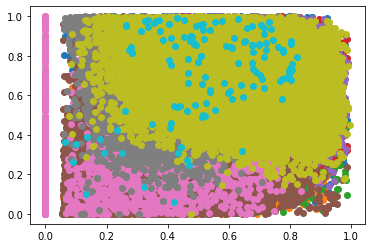

In [25]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

In [26]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    29788
1    30721
2     8059
3    35184
4    37218
5    14915
6     2410
7    16696
8    47186
9      136
dtype: int64

In [27]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.776,0.378,0,-8.035,1,0.0322,0.435,0.001870,0.1100,0.453,135.981,175861,4,3
1,0.663,0.697,0,-5.503,1,0.0508,0.272,0.008860,0.1530,0.873,180.035,198384,4,3
2,0.596,0.675,9,-7.790,1,0.0517,0.188,0.739000,0.1020,0.155,164.985,242163,4,0
3,0.593,0.274,2,-15.402,1,0.2780,0.934,0.000569,0.0758,0.346,160.031,226683,4,1
4,0.871,0.281,9,-10.650,0,0.0466,0.767,0.000180,0.1470,0.541,99.975,184259,4,1


In [28]:
X[X['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
187790,0.849,0.622,6,-7.273,1,0.325,0.579,0.0,0.193,0.802,130.14,181160,4,2


In [29]:
kmeans.inertia_

1541687.5778943351

### Chosing K

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

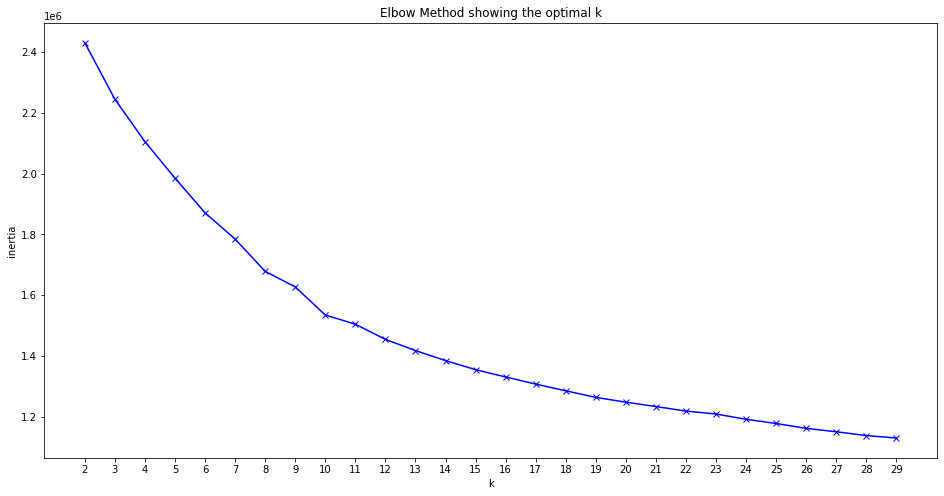

In [21]:
K = range(2, 30)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### k=8

K = range(2, 30)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
   
        
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [30]:
import pickle

In [31]:
with open("scaler_large.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [32]:
with open("scaler_large.pickle", "rb") as f:
    scaler=pickle.load(f)

scaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [34]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans = kmeans.fit(X_scaled_df)
kmeans.n_clusters

10

In [35]:
with open("kmeans_large.pickle", "wb") as f:
    pickle.dump(kmeans, f)

In [36]:
with open("kmeans_large.pickle", "rb") as f:
    model=pickle.load(f)

In [37]:
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 10,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [38]:
music_df2=pd.concat([music_df_s, X], axis=1)
music_df2.to_csv('Data/clustered_large_musicset_features.csv')